In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.spatial import distance_matrix
from sklearn.manifold import MDS
#print(repr(d.astype(int)))


!pip install scikit-learn

In [47]:
# open the sample file used 

file_name = '/mnt/f/year4/senior/RD100_DN-th0300.txt'
name  = "RD100_DN-th0300.txt"
timelimit = 20
#file_name = 'F:/year4/senior/FRI26_DN-th0250.txt'

In [48]:
# open the sample file used 

#file_name = '/mnt/f/year4/senior/GR17/GR17_GA-03.txt'
#file_name = 'FRI26_DN-th0250.txt'

file_path = open(file_name) 
# read the content of the file opened 
content = file_path.readlines() 
def read_tsp_instances_from_file(filename):
    instances=[]
    #print(filename[0])
    first_line = filename[0]
    _, _, num_samples_str = first_line.split()
    global N_samples
    N_samples, num_samples=int(num_samples_str), int(num_samples_str)
    num_points=10
    #print(num_samples_str)

    #GR17 5 21, 24 40
    #FRI26 5 30, 33 60
    start_line = 107
    end_line = 206
    # loop through each N-Sample
    for i, line in enumerate(filename):
        if i in range(start_line-1, end_line):
            #print("line",i)
            line=filename[i].strip()
            try:
                data=list(map(float, line.split()))
                data=list(map(int, data))
            except:
                data=list(map(float, line.split(',')))

            instances.append(data)
    return instances

tsp_instances=read_tsp_instances_from_file(content)

In [49]:
print(tsp_instances)

[[0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 0, 1000000, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 0, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 0, 0, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000], [1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 

In [50]:
n_point=len(tsp_instances)
time_step=n_point

print("points = ", n_point)

points =  100


In [51]:
def read_DN_origin(file_path, n_points):
    start_line = 4
    end_line = start_line + n_points
    delimiter = ','
    with open(file_path, 'r') as file: lines = file.readlines()
    
    distance_matrix=[]
    for i, line in enumerate(lines):
        if i in range(start_line, end_line):
            try:
                row=list(map(float, line.split()))
            except:
                row=list(map(float, line.split(',')))
            distance_matrix.append(row)
    
    return np.array(distance_matrix)

original_dist = read_DN_origin(file_name, len(tsp_instances[0]))

mds=MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)
coordinates=mds.fit_transform(original_dist)
coordinates-=coordinates.min(axis=0)
coordinates/=coordinates.max(axis=0)
df=pd.DataFrame(coordinates, columns=['x', 'y'])
print(len(df))
df

In [52]:
import pandas as pd

# Sample data as a string (normally you would read this from a file)
data = """1 1.43775e+02 8.62630e+02
2 8.81780e+02 1.18319e+00
3 5.45244e+02 7.35005e+02
4 5.02813e+02 8.76001e+02
5 2.04876e+02 3.45225e+02
6 7.01637e+02 5.76987e+02
7 1.47167e+02 1.64286e+02
8 1.35382e+02 8.07910e+02
9 6.28999e+02 9.76971e+02
10 6.74999e+02 7.31447e+02
11 3.13696e+02 2.99126e+02
12 4.45689e+02 9.81970e+02
13 3.54793e+02 7.65215e+02
14 3.98129e+02 9.76034e+02
15 2.73041e+02 8.53944e+02
16 6.66295e+02 3.12270e+02
17 8.76942e+02 9.25390e+02
18 1.34026e+02 9.49816e+02
19 9.66825e+02 7.26799e+02
20 6.59346e+02 8.89080e+02
21 4.00340e+02 8.74489e+02
22 1.18041e+02 3.12040e+02
23 8.09870e+02 5.08555e+01
24 1.62821e+01 1.14161e+02
25 1.26192e+01 4.82407e+01
26 6.50039e+02 9.40261e+02
27 7.91189e+02 7.58951e+02
28 9.07194e+02 6.12605e+02
29 5.10857e+02 2.58629e+01
30 3.16366e+01 4.31221e+02
31 7.76763e+02 2.53781e+02
32 5.31819e+02 9.06890e+02
33 6.54965e+02 7.67759e+02
34 1.86060e+02 2.06527e+02
35 5.64595e+02 2.99685e+00
36 4.10816e+02 4.37921e+02
37 9.30189e+02 6.39817e+02
38 9.41392e+02 8.89979e+02
39 3.41538e+02 3.94141e+01
40 1.62622e+02 9.51969e+01
41 1.07558e+02 2.62746e+02
42 8.26398e+01 1.31129e+02
43 4.30137e+01 7.79010e+01
44 5.54450e+02 9.97819e+01
45 6.08618e+02 2.27863e+02
46 8.89589e+02 7.60960e+02
47 5.59461e+02 5.08125e+02
48 1.36027e+01 5.08467e+02
49 4.02567e+02 8.39178e+02
50 8.86156e+02 7.64310e+02
51 8.46462e+01 6.29068e+02
52 4.86783e+02 2.59062e+02
53 6.47516e+02 5.53517e+02
54 9.67650e+02 8.24246e+02
55 2.36623e+02 1.52397e+00
56 8.79518e+02 7.37584e+02
57 5.09840e+02 4.20787e+02
58 9.36134e+02 3.03893e+02
59 8.72343e+02 4.99018e+02
60 1.42996e+02 8.40984e+02
61 2.33102e+02 3.03929e+02
62 1.99819e+02 9.37721e+02
63 3.02123e+02 8.47440e+02
64 3.65531e+02 5.66229e+02
65 1.07593e+02 5.49471e+02
66 8.02657e+02 3.44868e+02
67 3.19486e+02 8.13104e+02
68 3.24542e+00 7.01539e+02
69 1.80027e+02 7.66307e+02
70 9.77601e+02 9.68843e+02
71 1.46301e+01 8.42383e+02
72 9.22626e+02 9.54285e+02
73 8.96272e+02 7.89067e+02
74 6.67952e+02 9.06108e+02
75 4.25058e+02 8.69541e+02
76 8.65918e+02 3.69610e+02
77 8.98572e+02 5.39108e+02
78 6.21689e+02 8.78159e+02
79 6.73730e+02 6.13117e+02
80 8.92979e+01 4.91923e+02
81 1.47858e+02 4.59840e+02
82 4.28293e+02 9.05370e+02
83 5.17499e+01 6.36336e+02
84 8.26458e+02 2.31701e+02
85 4.26249e+02 9.46357e+02
86 3.16069e+02 8.53389e+02
87 2.75713e+02 9.73754e+02
88 8.35293e+02 2.47974e+02
89 9.70187e+02 6.35213e+01
90 1.23616e+02 6.44170e+02
91 2.26668e+02 5.62456e+02
92 8.08920e+02 7.91390e+02
93 9.42256e+02 5.31023e+02
94 7.05831e+02 4.55757e+02
95 8.56231e+02 5.09763e+02
96 3.52477e+02 1.16433e+00
97 3.08882e+02 8.42792e+02
98 7.50979e+02 3.94934e+02
99 6.10775e+02 5.84408e+02
100 4.83637e+02 1.16325e+02"""

# Split the data into lines
lines = data.split('\n')

# Initialize lists to hold coordinates
x_coords = []
y_coords = []

# Loop through each line and extract coordinates
for line in lines:
    parts = line.split()
    x_coords.append(float(parts[1]))
    y_coords.append(float(parts[2]))

# Create a DataFrame from the coordinates
df = pd.DataFrame({'x': x_coords, 'y': y_coords})

# Display the DataFrame
print(df)


          x          y
0   143.775  862.63000
1   881.780    1.18319
2   545.244  735.00500
3   502.813  876.00100
4   204.876  345.22500
..      ...        ...
95  352.477    1.16433
96  308.882  842.79200
97  750.979  394.93400
98  610.775  584.40800
99  483.637  116.32500

[100 rows x 2 columns]


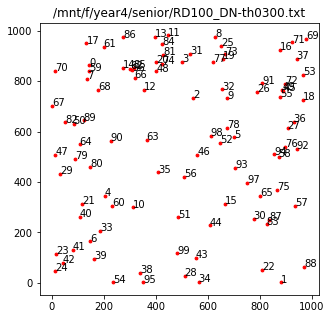

In [53]:
plt.figure(figsize=(5, 5))

city_index="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(len(df)):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red', s=8)
    if n_point<=26:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{city_index[i]}', fontsize=8)
    else:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{i}')

plt.title(file_name)
plt.show()

!pip install --upgrade --user ortools

In [54]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model(matrix):
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"]=matrix
    data["num_vehicles"] = 1
    data["depot"] = 2
#    print("infunction\n" + data["distance_matrix"])
    return data



In [55]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()} miles")
    index = routing.Start(0)
    plan_output = "Route for vehicle 0:\n"
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Route distance: {route_distance}miles\n"
    return solution.ObjectiveValue()


In [56]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data["distance_matrix"][from_node][to_node]

#transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [57]:
def get_routes(solution, routing, manager):
  """Get vehicle routes from a solution and store them in an array."""
  # Get vehicle routes and store them in a two dimensional array whose
  # i,j entry is the jth location visited by vehicle i along its route.
  routes = []
  for route_nbr in range(routing.vehicles()):
    index = routing.Start(route_nbr)
    route = [manager.IndexToNode(index)]
    while not routing.IsEnd(index):
      index = solution.Value(routing.NextVar(index))
      route.append(manager.IndexToNode(index))
    routes.append(route)
  return routes

In [58]:

"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model(tsp_instances)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data["distance_matrix"][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
"""search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.SAVINGS
)"""
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = timelimit

start = time.time()
# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)
end = time.time()
# Print solution on console.
if solution:
    print_solution(manager, routing, solution)
        
routes = get_routes(solution, routing, manager)
# Display the routes.
cost = solution.ObjectiveValue()
for i, route in enumerate(routes):
    print('Route', i, route)
print("The time of execution of above program is :", (end-start) * 10**3, "ms")

Objective: 0 miles
Route for vehicle 0:
 2 -> 52 -> 56 -> 15 -> 83 -> 1 -> 34 -> 28 -> 22 -> 88 -> 87 -> 97 -> 93 -> 98 -> 78 -> 5 -> 9 -> 26 -> 16 -> 91 -> 72 -> 71 -> 69 -> 53 -> 55 -> 49 -> 45 -> 37 -> 18 -> 36 -> 58 -> 27 -> 94 -> 92 -> 76 -> 75 -> 65 -> 57 -> 30 -> 44 -> 99 -> 95 -> 54 -> 24 -> 23 -> 6 -> 42 -> 41 -> 40 -> 80 -> 90 -> 89 -> 82 -> 79 -> 4 -> 29 -> 50 -> 64 -> 47 -> 21 -> 10 -> 35 -> 60 -> 33 -> 39 -> 38 -> 43 -> 51 -> 46 -> 63 -> 12 -> 85 -> 96 -> 86 -> 70 -> 67 -> 0 -> 7 -> 14 -> 17 -> 59 -> 61 -> 62 -> 68 -> 66 -> 74 -> 84 -> 81 -> 11 -> 8 -> 3 -> 48 -> 20 -> 13 -> 31 -> 77 -> 73 -> 19 -> 25 -> 32 -> 2

Route 0 [2, 52, 56, 15, 83, 1, 34, 28, 22, 88, 87, 97, 93, 98, 78, 5, 9, 26, 16, 91, 72, 71, 69, 53, 55, 49, 45, 37, 18, 36, 58, 27, 94, 92, 76, 75, 65, 57, 30, 44, 99, 95, 54, 24, 23, 6, 42, 41, 40, 80, 90, 89, 82, 79, 4, 29, 50, 64, 47, 21, 10, 35, 60, 33, 39, 38, 43, 51, 46, 63, 12, 85, 96, 86, 70, 67, 0, 7, 14, 17, 59, 61, 62, 68, 66, 74, 84, 81, 11, 8, 3, 48,

In [59]:
routes[0]

[2,
 52,
 56,
 15,
 83,
 1,
 34,
 28,
 22,
 88,
 87,
 97,
 93,
 98,
 78,
 5,
 9,
 26,
 16,
 91,
 72,
 71,
 69,
 53,
 55,
 49,
 45,
 37,
 18,
 36,
 58,
 27,
 94,
 92,
 76,
 75,
 65,
 57,
 30,
 44,
 99,
 95,
 54,
 24,
 23,
 6,
 42,
 41,
 40,
 80,
 90,
 89,
 82,
 79,
 4,
 29,
 50,
 64,
 47,
 21,
 10,
 35,
 60,
 33,
 39,
 38,
 43,
 51,
 46,
 63,
 12,
 85,
 96,
 86,
 70,
 67,
 0,
 7,
 14,
 17,
 59,
 61,
 62,
 68,
 66,
 74,
 84,
 81,
 11,
 8,
 3,
 48,
 20,
 13,
 31,
 77,
 73,
 19,
 25,
 32,
 2]

In [60]:
cost

0

In [61]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )

In [62]:
print(list_duplicates(routes[0]))
print(len(routes[0]))

[2]
101


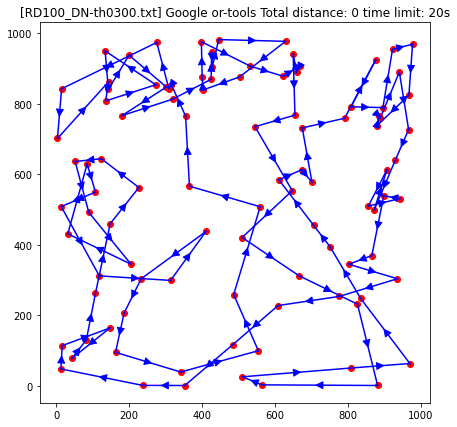

In [63]:
plt.figure(figsize=(7, 7))
#routes = [0, 3, 12, 6, 7, 5, 16, 13, 14, 2, 10, 9, 1, 4, 8, 11, 15, 0]
#cost = 2085
for i in range(len(tsp_instances[0])):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red')
    #plt.text(df.iloc[i]['x']+0.88, df.iloc[i]['y']+0.88, f'{i}')

for i in range(len(routes[0])-1):
    #plt.arrow(df.iloc[routes[i]]['x'], df.iloc[routes[i]]['y'], df.iloc[routes[i+1]]['x'] - df.iloc[routes[i]]['x'], df.iloc[routes[i+1]]['y'] - df.iloc[routes[i]]['y'], head_width=2, head_length=3, fc='blue', ec='blue')
    x1, y1=df.iloc[routes[0][i]]['x'], df.iloc[routes[0][i]]['y']
    x2, y2=df.iloc[routes[0][i+1]]['x'], df.iloc[routes[0][i+1]]['y']
    plt.plot([x1, x2], [y1, y2], c='blue')

    mid_x=(x1+x2)/2
    mid_y=(y1+y2)/2
    dx=(x2-x1)*0.05  # Offset along x-direction
    dy=(y2-y1)*0.05  # Offset along y-direction
    
    #plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y), arrowprops=dict(arrowstyle='->', color='blue'))
    plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y),
                 arrowprops=dict(arrowstyle='simple, tail_width=0.5, head_width=0.69, head_length=0.69', color='blue'))
        
    try: 
        plt.title(f"[{name}] Google or-tools Total distance: {cost} time limit: {timelimit}s")
    except:
        plt.title(f"LeapHybrid Total distance: {cost}")
plt.show()

In [67]:
file_path = open(file_name) 
# read the content of the file opened 
content = file_path.readlines() 
def read_tsp_instances_from_file(filename):
    instances=[]
    #print(filename[0])
    first_line = filename[0]
    _, _, num_samples_str = first_line.split()
    global N_samples
    N_samples, num_samples=int(num_samples_str), int(num_samples_str)
    num_points=10
    #print(num_samples_str)

    #GR17 5 21, 24 40
    #FRI26 5 30, 33 60
    start_line = 5
    end_line = 104
    # loop through each N-Sample
    for i, line in enumerate(filename):
        if i in range(start_line-1, end_line):
            #print("line",i)
            line=filename[i].strip()
            try:
                data=list(map(float, line.split()))
                data=list(map(int, data))
            except:
                data=list(map(float, line.split(',')))

            instances.append(data)
    return instances

tsp_instances=read_tsp_instances_from_file(content)

"""def read_distance_matrix(file_path):
    #Reads the distance matrix from a file.
    with open(file_path, 'r') as file:
        matrix = []
        for line in file:
            row = list(map(int, line.split()))
            matrix.append(row)
    return matrix"""

def calculate_route_distance(matrix, route):
    """Calculates the total distance of the given traversal route."""
    total_distance = 0
    num_stops = len(route)
    
    for i in range(num_stops - 1):
        from_location = route[i]
        to_location = route[i + 1]
        total_distance += matrix[from_location][to_location]
    
    return total_distance

# Example usage
if __name__ == "__main__":
    #distance_matrix_file = 'distance_matrix.txt'
    route = [2, 52, 56, 15, 83, 1, 34, 28, 22, 88, 87, 97, 93, 98, 78, 5, 9, 26, 16, 91, 72, 71, 69, 53, 55, 49, 45, 37, 18, 36, 58, 27, 94, 92, 76, 75, 65, 57, 30, 44, 99, 95, 54, 24, 23, 6, 42, 41, 40, 80, 90, 89, 82, 79, 4, 29, 50, 64, 47, 21, 10, 35, 60, 33, 39, 38, 43, 51, 46, 63, 12, 85, 96, 86, 70, 67, 0, 7, 14, 17, 59, 61, 62, 68, 66, 74, 84, 81, 11, 8, 3, 48, 20, 13, 31, 77, 73, 19, 25, 32, 2]  # Example traversal route
    
    # Read the distance matrix
    distance_matrix = tsp_instances
    
    # Calculate the total distance for the given route
    total_distance = calculate_route_distance(distance_matrix, route)
    
    print(f"The total distance for the route {route} is: {total_distance}")

The total distance for the route [2, 52, 56, 15, 83, 1, 34, 28, 22, 88, 87, 97, 93, 98, 78, 5, 9, 26, 16, 91, 72, 71, 69, 53, 55, 49, 45, 37, 18, 36, 58, 27, 94, 92, 76, 75, 65, 57, 30, 44, 99, 95, 54, 24, 23, 6, 42, 41, 40, 80, 90, 89, 82, 79, 4, 29, 50, 64, 47, 21, 10, 35, 60, 33, 39, 38, 43, 51, 46, 63, 12, 85, 96, 86, 70, 67, 0, 7, 14, 17, 59, 61, 62, 68, 66, 74, 84, 81, 11, 8, 3, 48, 20, 13, 31, 77, 73, 19, 25, 32, 2] is: 13840
